## EDA and data preparation
The same code is converted to script.
As a result this script creates 
``data/processed/main.csv``

Note: For ydata-profiling report I've used next version
``pip install ydata-profiling==4.1.2``  

In [26]:
import numpy as np
from ydata_profiling import ProfileReport
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime
warnings.filterwarnings('ignore')

## Investigate source data

In [2]:
df = pd.read_csv("../data/raw/sport_car_price.csv")

In [3]:
df.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [4]:
df.columns = df.columns.str.replace(" ", "_").str.replace("-","_").str.replace("(","").str.replace(")","").str.lower()

In [5]:
df.head(100)

,car_make,car_model,year,engine_size_l,horsepower,torque_lb_ft,0_60_mph_time_seconds,price_in_usd
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
95,Pagani,Huayra,2022,6,764,738,2.8,"2,800,000"
96,Porsche,718 Cayman GT4,2022,4,414,309,4.2,"100,550"
97,Rimac,Nevera,2022,Electric,1914,1696,1.95,"2,400,000"
98,Rolls-Royce,Wraith,2021,6.8,624,605,4.4,"330,000"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   car_make               1007 non-null   object
 1   car_model              1007 non-null   object
 2   year                   1007 non-null   int64 
 3   engine_size_l          997 non-null    object
 4   horsepower             1007 non-null   object
 5   torque_lb_ft           1004 non-null   object
 6   0_60_mph_time_seconds  1007 non-null   object
 7   price_in_usd           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


Missing values: engine_size_l, torque_lb_ft

In [7]:
df.nunique()

car_make                  38
car_model                176
year                       9
engine_size_l             45
horsepower               124
torque_lb_ft              93
0_60_mph_time_seconds     43
price_in_usd             367
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   car_make               1007 non-null   object
 1   car_model              1007 non-null   object
 2   year                   1007 non-null   int64 
 3   engine_size_l          997 non-null    object
 4   horsepower             1007 non-null   object
 5   torque_lb_ft           1004 non-null   object
 6   0_60_mph_time_seconds  1007 non-null   object
 7   price_in_usd           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


In [9]:
df.describe(include='all')

,car_make,car_model,year,engine_size_l,horsepower,torque_lb_ft,0_60_mph_time_seconds,price_in_usd
count,1007,1007,1007.000000,997,1007,1004,1007,1007
unique,38,176,NaN,45,124,93,43,367
top,Porsche,GT,NaN,4,503,590,3.5,"500,000"
freq,88,55,NaN,219,45,71,153,34
mean,NaN,NaN,2021.201589,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,2.019802,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1965.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2021.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2021.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2022.000000,NaN,NaN,NaN,NaN,NaN


In [10]:
df.isnull().sum()

car_make                  0
car_model                 0
year                      0
engine_size_l            10
horsepower                0
torque_lb_ft              3
0_60_mph_time_seconds     0
price_in_usd              0
dtype: int64

In [11]:
df.groupby('engine_size_l').size().sort_values(ascending=False) 

engine_size_l
4                       219
6.2                     113
3                        85
3.5                      79
5                        68
6.5                      46
3.8                      38
Electric                 36
3.7                      35
2                        34
2.9                      30
3.9                      30
5.2                      29
6                        28
2.5                      25
8                        23
4.7                      23
4.4                      11
6.8                       6
1.7                       4
8.4                       3
Electric Motor            3
1.8                       3
6.6                       3
Hybrid                    2
1.5                       2
Electric (100 kWh)        1
Electric (93 kWh)         1
Electric (tri-motor)      1
7                         1
6.7                       1
-                         1
6.4                       1
6.3                       1
5.7                       1
5.5   

In [12]:
df.groupby('torque_lb_ft').size().sort_values(ascending=False) 

torque_lb_ft
590    71
443    47
406    42
516    38
650    36
       ..
440     1
442     1
0       1
475     1
944     1
Length: 93, dtype: int64

In [13]:
df.groupby('0_60_mph_time_seconds').size().sort_values(ascending=False) 

0_60_mph_time_seconds
3.5      153
3.8       70
2.9       62
2.8       58
3.6       51
3.1       50
2.5       48
4         42
4.4       37
3         37
3.2       35
4.2       32
4.9       26
4.1       25
3.3       23
2.7       22
3.4       21
3.9       21
3.7       21
4.7       20
1.9       19
4.8       15
2.4       14
2.6       13
5         11
5.4       10
4.3        8
4.5        8
1.85       7
5.3        7
5.2        7
5.1        7
2.3        7
4.6        6
1.98       5
1.8        2
2.2        1
2.1        1
2          1
1.95       1
6.4        1
6.5        1
< 1.9      1
dtype: int64

In [14]:
df.groupby('horsepower').size().sort_values(ascending=False) 

horsepower
503      45
591      39
650      31
660      30
416      29
         ..
1,020     1
485       1
550       1
621       1
482       1
Length: 124, dtype: int64

In [15]:
df.groupby('price_in_usd').size().sort_values(ascending=False) 

price_in_usd
500,000      34
3,000,000    24
625,000      22
58,900       17
114,000      16
             ..
346,300       1
35,000        1
36,120        1
363,730       1
99,990        1
Length: 367, dtype: int64

## Data preparation

In [16]:
df['engine_size_l'].fillna(0,inplace=True)
df['engine_size_l'] = pd.to_numeric(df['engine_size_l'], errors='coerce')

df['torque_lb_ft'] = df['torque_lb_ft'].str.replace('+', '').str.replace(',', '').str.replace('-', lambda x: np.nan)
df['torque_lb_ft'].fillna(0,inplace=True)
df['torque_lb_ft']= df['torque_lb_ft'].astype(float)

df['price_in_usd']= df['price_in_usd'].str.replace(',','')
df['price_in_usd'] = df['price_in_usd'].astype(int)

df['horsepower'] = df['horsepower'].astype(int)

df['0_60_mph_time_seconds'] = df['0_60_mph_time_seconds'].str.replace('<', '').str.replace(' ', '')
df['0_60_mph_time_seconds'] = df['0_60_mph_time_seconds'].astype(float)

df['car_make_model'] = df['car_make'] + ' ' + df['car_model']
year = datetime.datetime.now().year
df['age'] = year - df['year']
df.dropna(inplace=True)

# df.sort_values('year', ascending=True, inplace=True)
# df.drop_duplicates(subset='car_make_model', keep='first', inplace=True)

## Analyze columns

In [17]:
profile = ProfileReport(df, title="Profiling Report")

In [18]:
profile.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
profile.to_notebook_iframe()

### Analysis of target variable price_in_usd

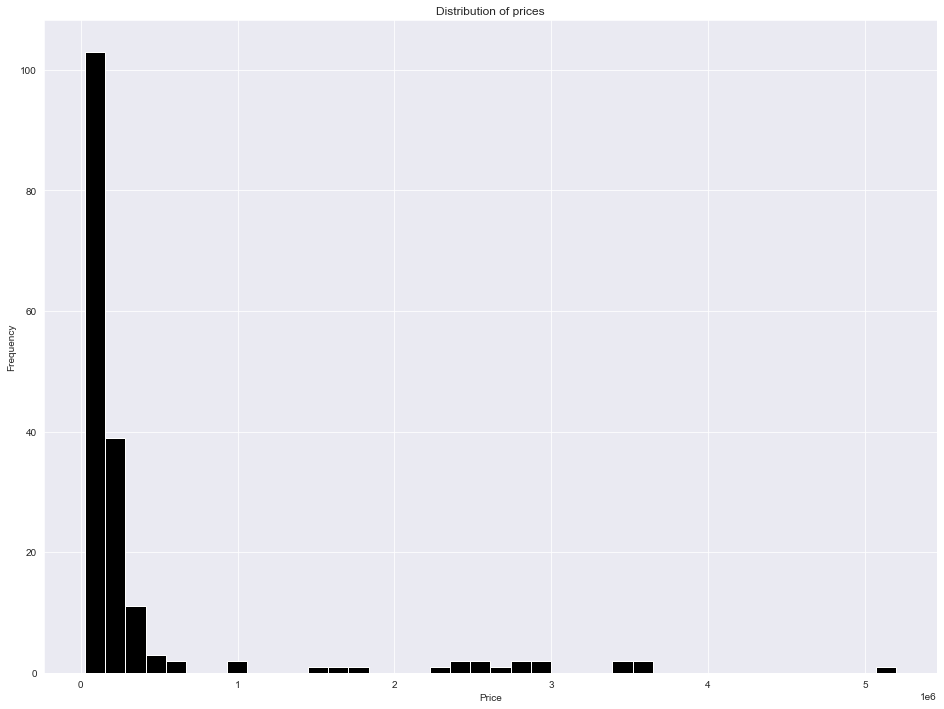

In [20]:
plt.figure(figsize=(16, 12))

sns.histplot(df.price_in_usd, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

## Analysis of car_make:

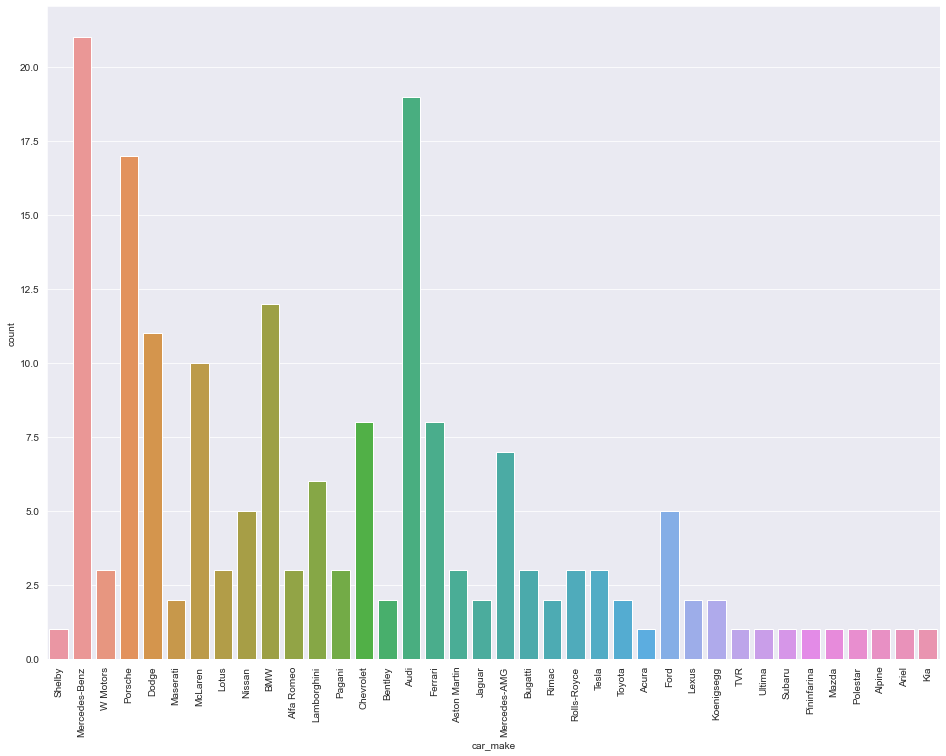

In [21]:
plt.figure(figsize=(16, 12))
sns.countplot(x=df.car_make)
sns.set(rc={'figure.figsize':(16, 12)})
plt.xticks(rotation=90)
plt.show()

## Analysis of year:

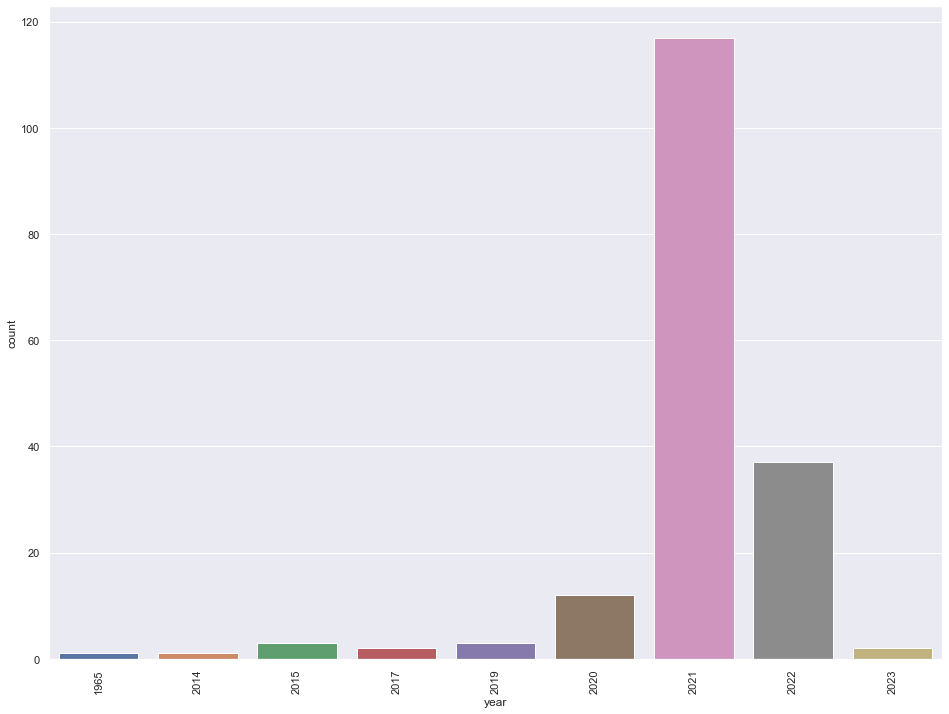

In [22]:
plt.figure(figsize=(16, 12))
sns.countplot(x=df.year)
sns.set(rc={'figure.figsize':(6, 4)})
plt.xticks(rotation=90)
plt.show()


## Numerical variables
year
engine_size_l
horsepower
torque_lb_ft
0_60_mph_time_seconds
price_in_usd


In [23]:
numerical_columns = df.select_dtypes([int,float])

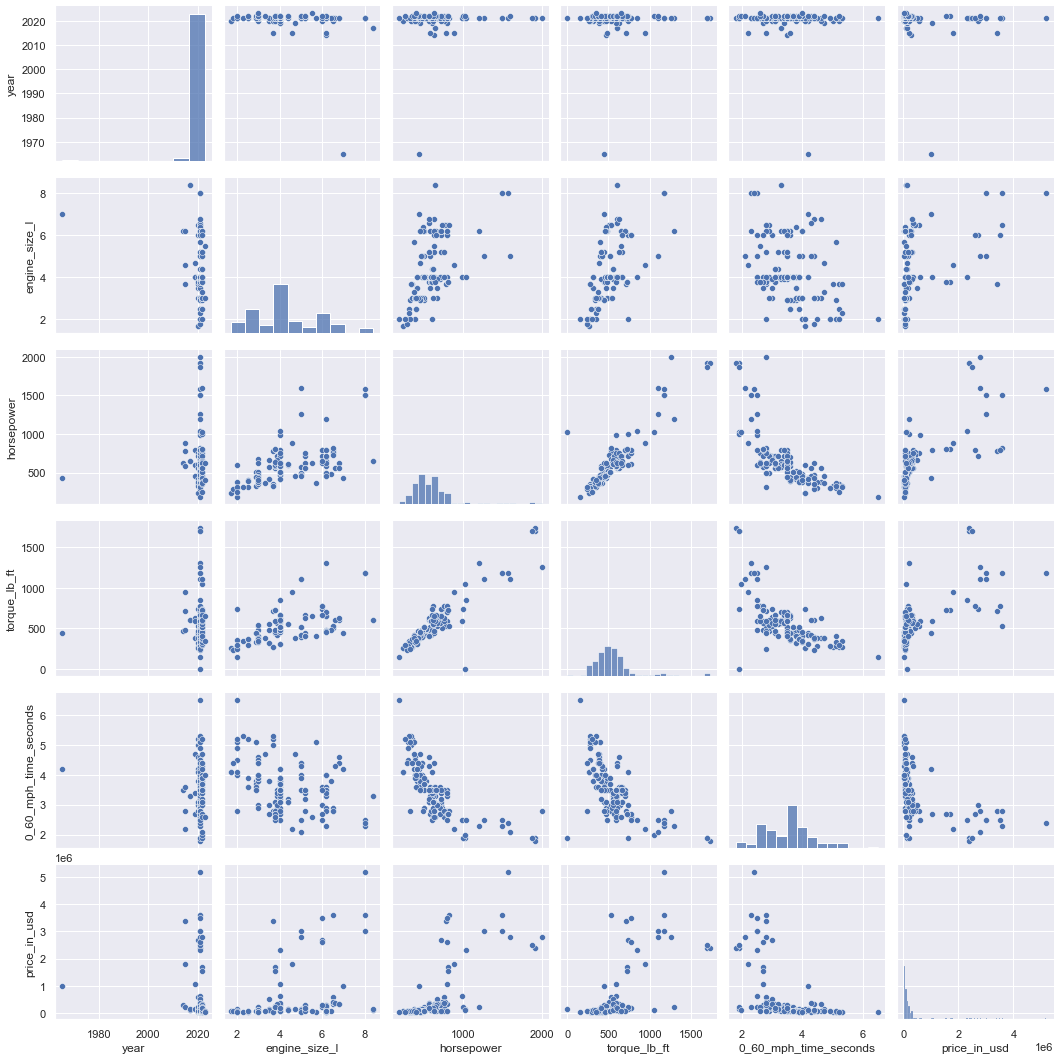

In [24]:
sns.pairplot(numerical_columns)
plt.show()

## Correlation matrix

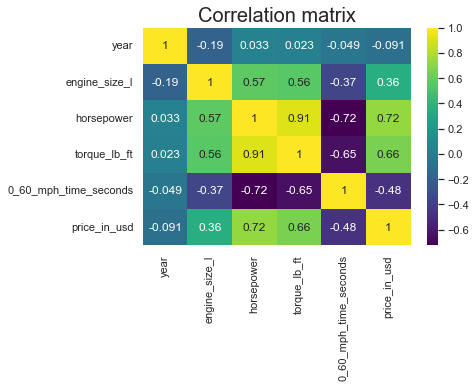

In [25]:
sns.heatmap(numerical_columns.corr(), cmap='viridis', annot=True);
plt.title("Correlation matrix", size=20)
plt.show()

## Final thoughts:
- I've analyzed the data
- Found important features (horsepower, torque_lb_ft)
- Removed duplicates
- Prepared data